In [165]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import product
import seaborn as sns
import sklearn.preprocessing

%matplotlib inline

sns.set_context('talk')

# Q2

### Function generates n points uniformly distributed over the surface ofa unit-radius d-dimensional ball.

In [10]:
def sample_unif_sphere(n=30, d=100):
    ## d is the dimension of the space in which the sphere lives
    balls = np.random.normal(0,1,size=(n,d))
    
    for i in range(n):
        balls[i,:] /= np.linalg.norm(balls[i,:])
    
    return balls

### Generate 200 points on the surface of a sphere in 50 dimensions.

In [100]:
pts = sample_unif_sphere(n=200, d=50)

### Create several random lines through the origin and project the points onto each line. Plot the distribution of points on each line.

In [39]:
def project_onto_lines(pts, n_lines):
    d = pts.shape[1]
    
    us = np.random.normal(0,1,size=(n_lines,d))
    us = sklearn.preprocessing.normalize(us, axis=1)
    
    return pts @ us.T

In [40]:
projected_pts = project_onto_lines(pts, n_lines=10)

[]

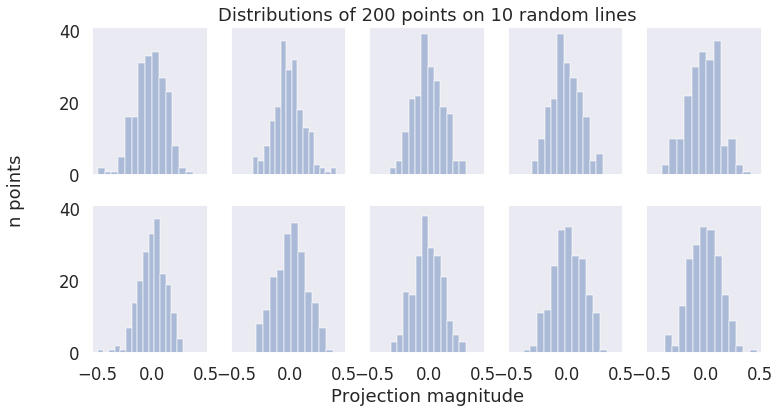

In [161]:
sns.set_style("dark")
fig,axes = plt.subplots(2,5, sharex=True, sharey=True, figsize=(12,6))

for i,ax in enumerate(axes.flatten()):
#for i in range(projected_pts.shape[1]):
    sns.distplot(projected_pts[:,i], kde=False, ax=ax)
    
    
fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.title('Distributions of 200 points on 10 random lines')
plt.xlabel('Projection magnitude')
plt.ylabel('n points')

plt.savefig('./HW2-10_lines.png')
plt.plot()

### Consider more than 200 points. How does effects change with the dimension d.

In [166]:
ds = [100,200,500,1000]
ns = [300,500,1000]
pts_list = [sample_unif_sphere(n=n, d=d) for n,d in product(ns,ds)]

projected_pts_list = [project_onto_lines(pts, n_lines=1) for pts in pts_list]

[]

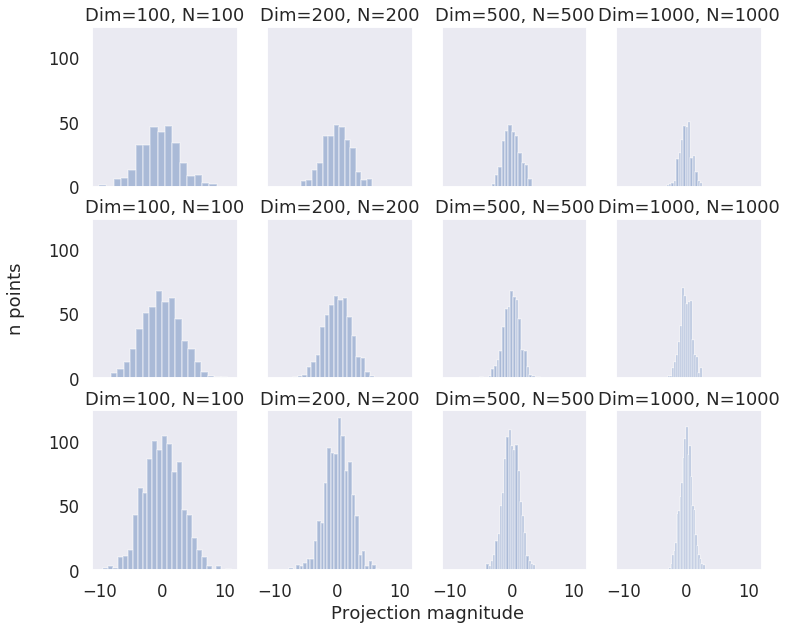

In [176]:
sns.set_style("dark")
fig,axes = plt.subplots(len(ns),len(ds), sharex=True, sharey=True, figsize=(12,10))

for i,(ax,(n,d)) in enumerate(zip(axes.flatten(), product(ns,ds))):
    sns.distplot(projected_pts_list[i], kde=False, ax=ax, label='')
    ax.set_title(f'Dim={d}, N={d}')
    #ax.legend()
    
fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
#plt.title('Distributions of 500 points on random lines for varying d')
plt.xlabel('Projection magnitude')
plt.ylabel('n points')

plt.savefig('./HW2-vary_d.png')
plt.plot()

# Q3

In [137]:
from sklearn.metrics.pairwise import euclidean_distances

In [135]:
def sample_unif_sphere(n=30, d=100, r=30):
    ## d is the dimension of the space in which the sphere lives
    balls = np.random.normal(0,1,size=(n,d))
    
    for i in range(n):
        balls[i,:] /= np.linalg.norm(balls[i,:]) / r
    
    return balls

In [148]:
def project2subspace(pts, dim):
    d = pts.shape[1]
    
    proj = np.eye(d)
    drop = np.random.randint(0,d-1,size=dim)
    proj = np.delete(proj, drop, axis=1)
        
    return pts @ proj @ proj.T

In [149]:
pts = sample_unif_sphere(n=20, d=900, r=30)

In [150]:
pairwise_dist = euclidean_distances(pts,pts).flatten()

In [177]:
max_diffs = []
ks = [100,50,10,5,4,3,2,1]
for k in ks:
    pts_hat = project2subspace(pts, k)
    pwise_hat = euclidean_distances(pts_hat, pts_hat).flatten()
    max_diff = np.max(np.abs(
        pairwise_dist * np.sqrt(k) - pwise_hat))
    max_diffs.append(max_diff / np.sqrt(k) * 100)

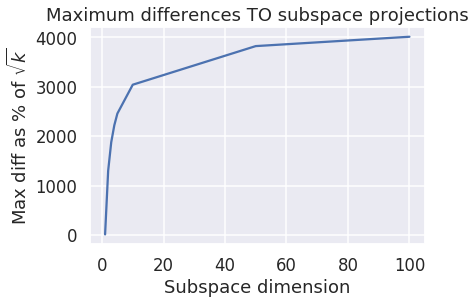

In [179]:
sns.set_style("darkgrid")

plt.plot(ks, max_diffs)
plt.xlabel('Subspace dimension')
plt.ylabel(r'Max diff as % of $\sqrt{k}$')
plt.title('Maximum differences TO subspace projections')

plt.savefig('HW2-subspace_maxdiff.png')